In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier
from sklearn.metrics import accuracy_score,classification_report

In [24]:
df=pd.read_excel('glass.xlsx',sheet_name='glass')

In [25]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [26]:
df.shape

(214, 10)

In [27]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [28]:
df.duplicated().sum()

1

In [29]:
df.drop_duplicates(inplace=True)

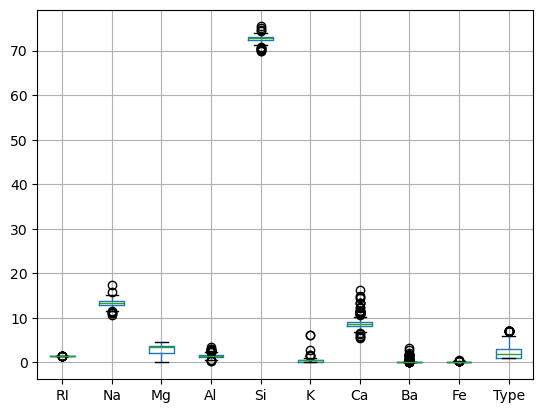

In [30]:
df.boxplot()
plt.show()

In [31]:
def outlier_capping(df,column):
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1
    lower_extreme=Q1-(1.5*IQR)
    upper_extreme=Q3+(1.5*IQR)
    df[column]=df[column].apply(lambda x:lower_extreme if x<lower_extreme else upper_extreme if x>upper_extreme else x)
for col in df.select_dtypes(['int','float']):
    outlier_capping(df,col)

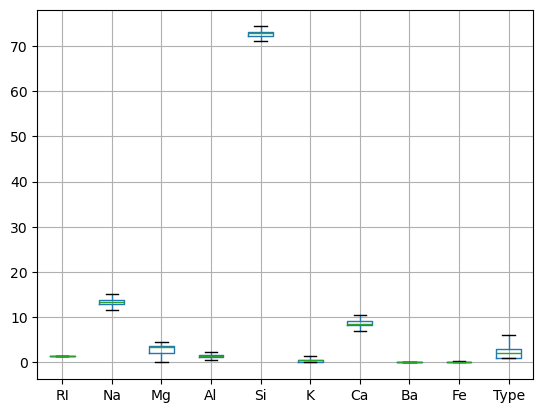

In [32]:
df.boxplot()
plt.show()

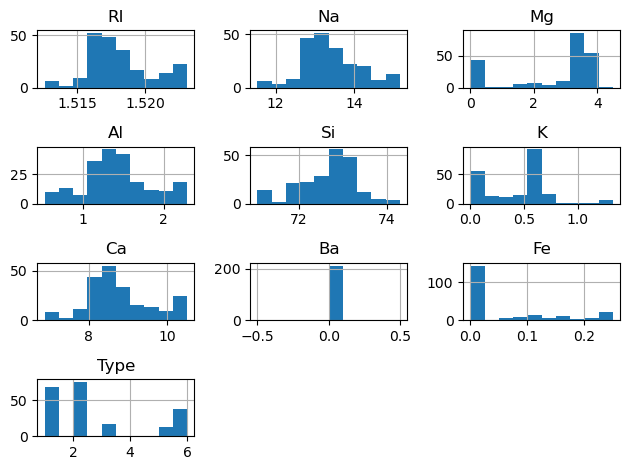

In [33]:
df.hist()
plt.tight_layout()
plt.show()

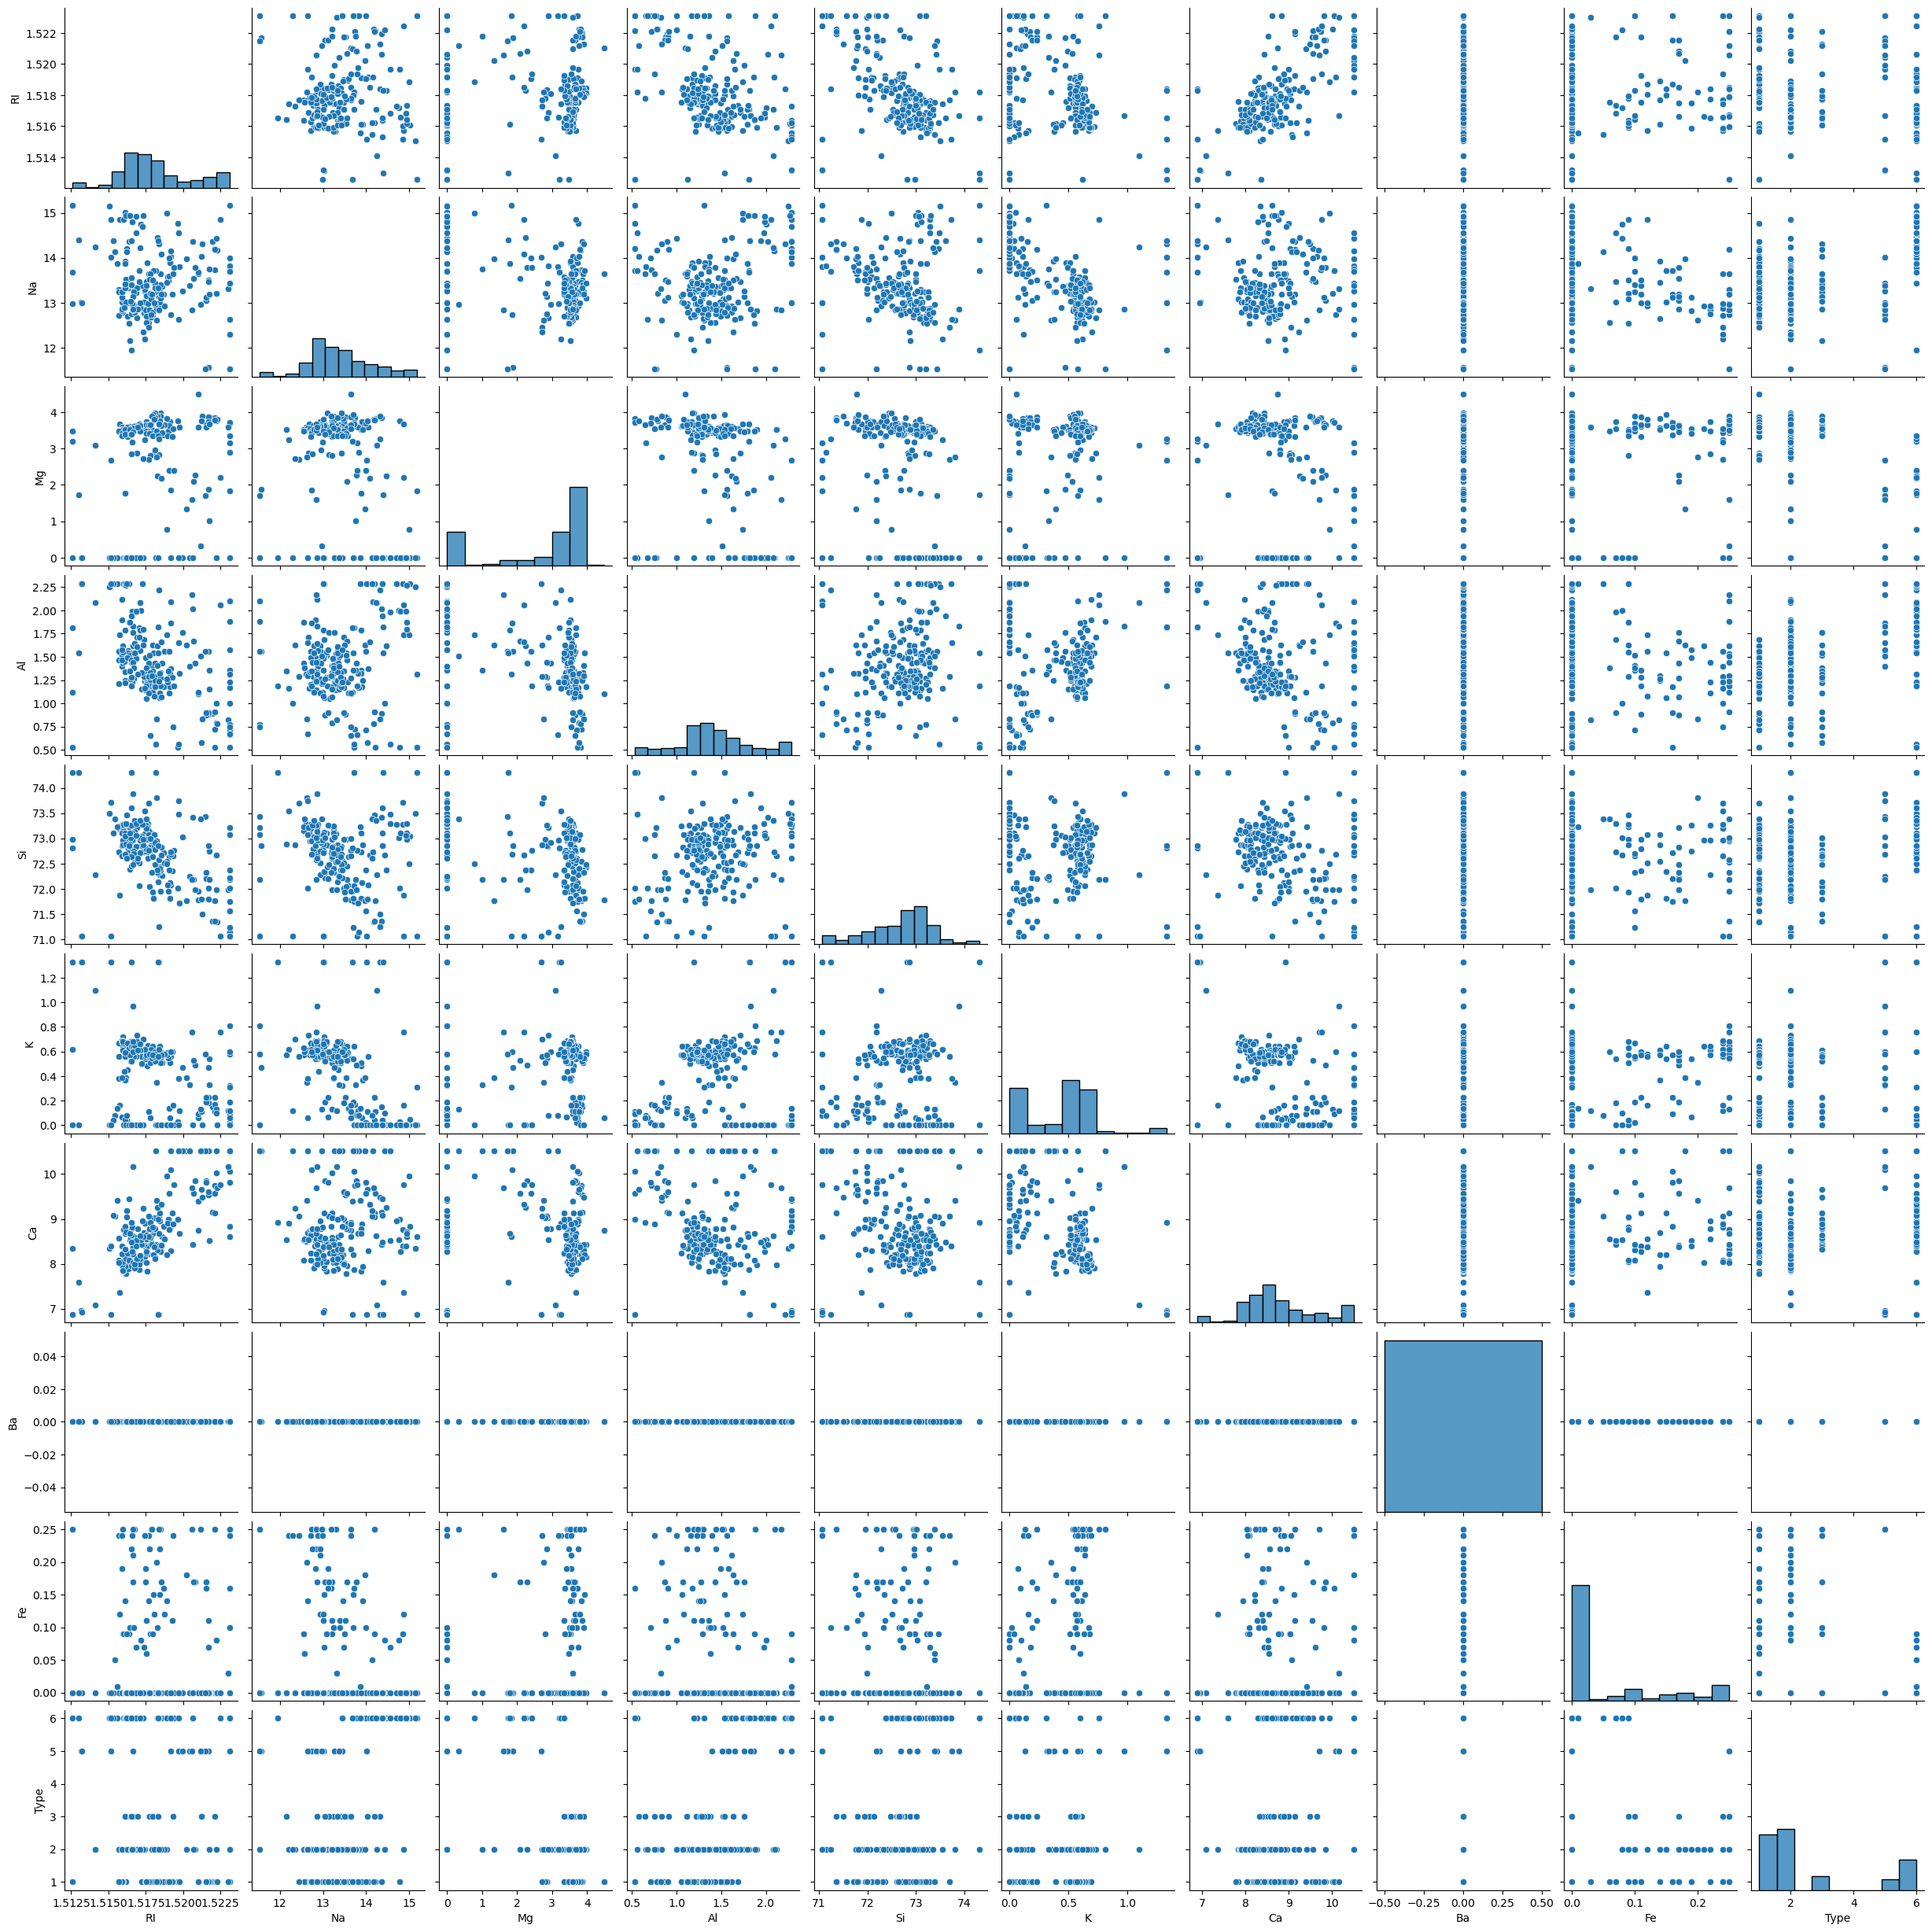

In [34]:
sns.pairplot(df)
plt.show()

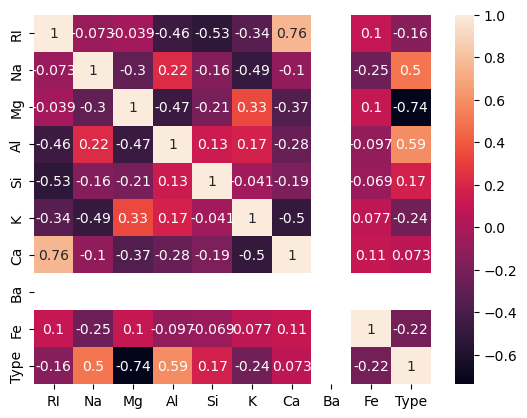

In [35]:
corr=df.corr()
sns.heatmap(corr,annot=True)
plt.show()

In [36]:
## Barium is not required 

In [37]:
target=df[['Type']]
target.head()

,Type
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


In [38]:
features=df.drop(columns='Type')
features.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [39]:
freg=f_regression(features,target)

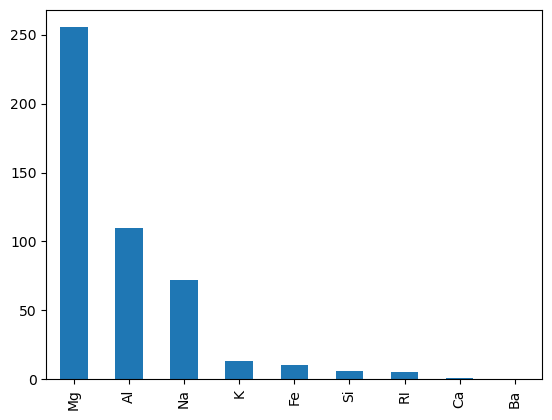

In [40]:
pd.Series(freg[0],index=features.columns).sort_values(ascending=False).plot(kind='bar')
plt.show()

In [41]:
features=features.drop(columns=['Ca','Ba'])
features.head()

,RI,Na,Mg,Al,Si,K,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,0.0


In [42]:
## No missing value

In [43]:
## No categorical columns

In [45]:
sca=StandardScaler()

In [54]:
feature=pd.DataFrame(sca.fit_transform(features),columns=features.columns)

In [55]:
feature.head()

,RI,Na,Mg,Al,Si,K,Fe
0,1.216093,0.322680,1.257238,-0.773927,-1.361078,-1.253536,-0.621102
1,-0.227207,0.660556,0.639311,-0.154741,0.086641,0.124799,-0.621102
2,-0.834242,0.174014,0.604596,0.273927,0.482859,-0.170559,-0.621102
3,-0.205982,-0.258467,0.701798,-0.321445,-0.096228,0.420156,-0.621102
4,-0.307862,-0.177377,0.653197,-0.440519,0.620012,0.354521,-0.621102


In [57]:
x_train,x_test,y_train,y_test=train_test_split(feature,target,train_size=0.8,random_state=100)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(170, 7)
(43, 7)
(170, 1)
(43, 1)


In [61]:
ra=RandomForestClassifier(n_estimators=150,bootstrap=True,max_features='sqrt',max_samples=0.9,random_state=50)

In [62]:
ra.fit(x_train,y_train)


RandomForestClassifier(max_samples=0.9, n_estimators=150, random_state=50)

In [66]:
y_pred=ra.predict(x_train)
accuracy_score(y_train,y_pred)

1.0

In [68]:
y_pred1=ra.predict(x_test)

In [70]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

         1.0       0.67      1.00      0.80        10
         2.0       0.69      0.73      0.71        15
         3.0       0.50      0.25      0.33         4
         5.0       1.00      0.43      0.60         7
         6.0       0.71      0.71      0.71         7

    accuracy                           0.70        43
   macro avg       0.71      0.63      0.63        43
weighted avg       0.72      0.70      0.68        43



In [94]:
bag_class=BaggingClassifier(estimator=DecisionTreeClassifier(),n_estimators=100,
                           max_samples=0.8,random_state=40)

In [95]:
bag_class.fit(x_train,y_train)
y_pred=bag_class.predict(x_test)
accuracy_score(y_test,y_pred)

0.7209302325581395

In [102]:
boost_model = AdaBoostClassifier(estimator=DecisionTreeClassifier(),n_estimators=100,learning_rate=1.0,random_state=100)

In [103]:
boost_model.fit(x_train, y_train)
y_pred = boost_model.predict(x_test)
print("Boosting Accuracy:", accuracy_score(y_test, y_pred))

Boosting Accuracy: 0.7209302325581395


In [104]:
## got same accuracy for bagging and boosting

#  Explain Bagging and Boosting methods. How is it different from each other.

Bagging builds multiple models in parallel on random subsets of data to reduce variance.
Boosting builds models sequentially, each correcting previous errors, to reduce bias.

#  Explain how to handle imbalance in the data.

Imbalance can be handled through models by using algorithms that support class weights (like Logistic Regression, SVM, Random Forest, XGBoost). These models assign higher weights to the minority class so that the model pays more attention to it, improving prediction balance without changing the dataset.